In [14]:

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

from tools_pattern import get_eucledean_dist
import compress_pickle

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

# script_n = os.path.basename(__file__).split('.')[0]
script_n = '2share_dist_cumulative_components_210116'

# /n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_analysis/1share/2share_by_dist_gen_210117.py


norm = 555

def calc_mpd(input_data, kind):
    mpd = MyPlotData()
    for n, distances in enumerate(input_data[0]):
        hist = defaultdict(int)
        mpd_trial = MyPlotData()
        for d in distances:
            # mpd.add_data_point(
            #     dist=d,
            #     kind='Naive Random',
            #     trial=n,
            #     )
            hist[int(d)] += 1
        # for d in sorted(hist.keys()):
        for d in range(max(hist.keys())):
#             if hist[d] <= 5:
#                 # remove less sampled data point
#                 continue
            # remove outlier data points
            if d > 60:
                break
            mpd_trial.add_data_point(
                dist=d,
                count=hist[d],
                kind=kind,
                trial=n,
            )
        mpd_trial = mpd_trial.to_pdf('count', cumulative=True, fixed_scale=norm)
        mpd.append(mpd_trial)
    return mpd

mpd_data = {}
labels = []

import compress_pickle
# label = 'Data'
# labels.append(label)
# data = compress_pickle.load('2share_by_dist_observed.gz')
# mpd_data[label] = calc_mpd(data, kind=label)

# label = 'Local Random'
# labels.append(label)
# data = compress_pickle.load('2share_by_dist_naive_10.gz')
# mpd_data[label] = calc_mpd(data, kind=label)

base = '2share_by_dist_210117'
n = 200

label = 'Anatomically correct shuffle'
labels.append(label)
data = compress_pickle.load(f'{base}_random_correct_{n}.gz')
mpd_data[label] = calc_mpd(data, kind=label)

label = 'without GrC input distribution'
labels.append(label)
data = compress_pickle.load(f'{base}_random_constant_grc_degree_{n}.gz')
mpd_data[label] = calc_mpd(data, kind=label)

label = 'without MF output distribution'
labels.append(label)
data = compress_pickle.load(f'{base}_random_no_gt_mf_degree_{n}.gz')
mpd_data[label] = calc_mpd(data, kind=label)

label = 'without GrC dendrite length dist.'
labels.append(label)
data = compress_pickle.load(f'{base}_random_fixed_length_{n}.gz')
mpd_data[label] = calc_mpd(data, kind=label)




Height: 4, Aspect: 1.33


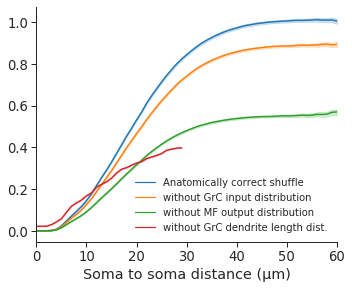

In [15]:

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=False, fontsize=10)


mpd_total = MyPlotData()
for label in labels:
    mpd_total.append(mpd_data[label])
# mpd_total.append(mpd_naive)
# mpd_total.append(mpd_random_correct)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_total,
    x='dist',
    y='count',
    hue='kind',
    kind='line',
    # stat="density",
    # kde=True,
    # hue_order=['Data', 'Shuffle'],
    context='paper',
    xlim=(0, 60),
    # ylim=[0, 1.01],
    height=4,
    aspect=1.33,
#     aspect=.8,
#     y_axis_label='Normalized cumulative pairs\nwith 2-shared inputs',
#     y_axis_label='Normalized cumulative pairs\nsharing 2 MF inputs',
    x_axis_label='Soma to soma distance (μm)',
    save_filename=f'{script_n}.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
    )
